## Introducción

A lo largo de este proyecto se realiza una exploración de datos faltantes en el dataset titanic, mediante el uso de tablas y gráficas para comprender mejor cómo están distribuidos los valores nulos el el dataset. 

## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install matplotlib==3.5.1 missingno numpy pandas seaborn upsetplot==0.6.1
```

o 

```bash
pip install -r requirements.txt
```

```bash
missingno
numpy
matplotlib==3.5.1
pandas
seaborn
upsetplot==0.6.1
```

## Importar librerías

In [26]:
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import upsetplot

## Importar funciones personalizadas

In [3]:
%run pandas-missing-extension.ipynb

## Configurar el aspecto general de las gráficas del proyecto

In [4]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (9, 5)
    }
)

sns.set_style("whitegrid")

## Cargar los conjuntos de datos

In [5]:
df = pd.read_csv('./titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Tabulación de valores faltantes

In [6]:
df.shape

(418, 12)

Hay 12 variables y 418 registros

### ¿Cuántos valores deberían existir en el dataset si no faltaran datos?

In [7]:
v_totales = df.size
v_totales

5016

### ¿Cuántos valores faltantes existen en el dataset?

In [8]:
v_f_totales = df.isna().sum().sum()
v_f_totales

414

### ¿Cuántos valores completos existen en el dataset?

In [9]:
v_totales - v_f_totales

4602

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [10]:
df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,PassengerId,0,418,0.000000
1,Survived,0,418,0.000000
2,Pclass,0,418,0.000000
3,Name,0,418,0.000000
4,Sex,0,418,0.000000
5,Age,86,418,20.574163
6,SibSp,0,418,0.000000
7,Parch,0,418,0.000000
8,Ticket,0,418,0.000000
9,Fare,1,418,0.239234


En la tabla anterior se muestran las variables y el número de valores faltantes para cada una.

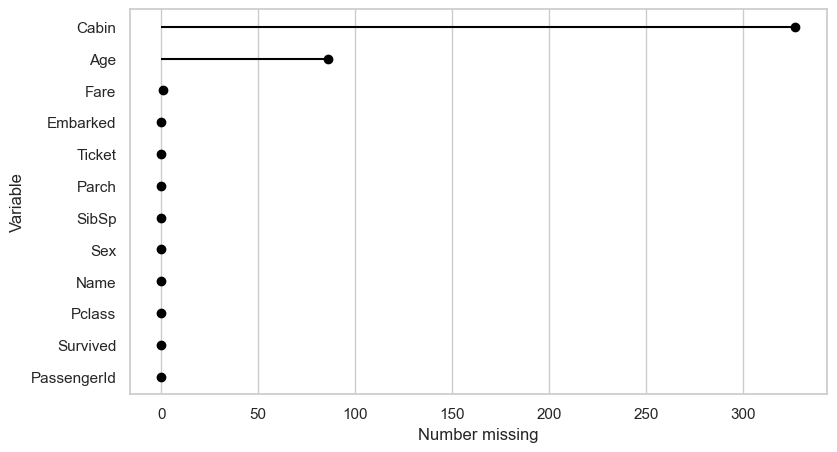

In [11]:
df.missing.missing_variable_plot()

###### Tabulación del resumen por variable

In [12]:
df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,9,75.000000
1,1,1,8.333333
2,86,1,8.333333
3,327,1,8.333333


En la tabla anterior se muestra la cantidad de valores faltantes y cuántas variables tienen esa cantidad de valores faltantes.
- 9 variables no tienen ningún valor faltante
- 1 variable tiene 1 valor faltante
- 1 variable tiene 86 valores faltantes
- variable tiene 327 valores faltantes

#### Casos / Observaciones / Filas

##### Resúmenes por caso

In [13]:
df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,1,7.142857
1,1,1,7.142857
2,2,1,7.142857
3,3,1,7.142857
4,4,1,7.142857
...,...,...,...
413,413,2,14.285714
414,414,0,0.000000
415,415,1,7.142857
416,416,2,14.285714


En la tabla anterior se puede apreciar el índice de la fila y cuántos valores faltantes hay por cada fila.

###### Tabulación del resumen por caso

In [14]:
df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,1,248,59.330144
1,0,87,20.813397
2,2,83,19.856459


La tabla anterior muestra que hay:
- 248 filas con 1 valore faltante
- 87 filas con 0 valores faltantes
- 83 filas con 2 valores faltantes

Se puede ver mejor en la siguiente gráfica:

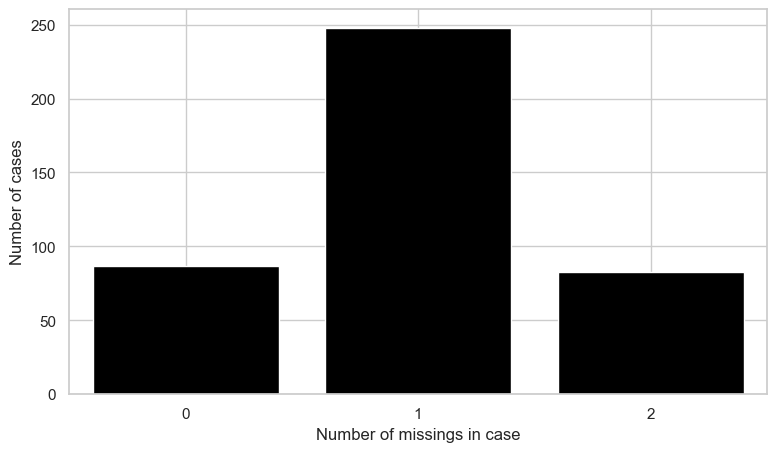

In [15]:
df.missing.missing_case_plot()

### Nombres de las variables con valores faltantes

In [16]:
columns_with_missing = df.missing.missing_variable_name()
columns_with_missing

Index(['Age', 'Fare', 'Cabin'], dtype='object')

### Intervalos de valores faltantes

#### Age:

In [27]:
(
    df
    .missing
    .missing_variable_span(
        variable = columns_with_missing[0],
        span_every = 10
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,0,10,0.0,100.0
1,1,1,9,10.0,90.0
2,2,2,8,20.0,80.0
3,3,3,7,30.0,70.0
4,4,2,8,20.0,80.0
5,5,2,8,20.0,80.0
6,6,1,9,10.0,90.0
7,7,1,9,10.0,90.0
8,8,4,6,40.0,60.0
9,9,2,8,20.0,80.0


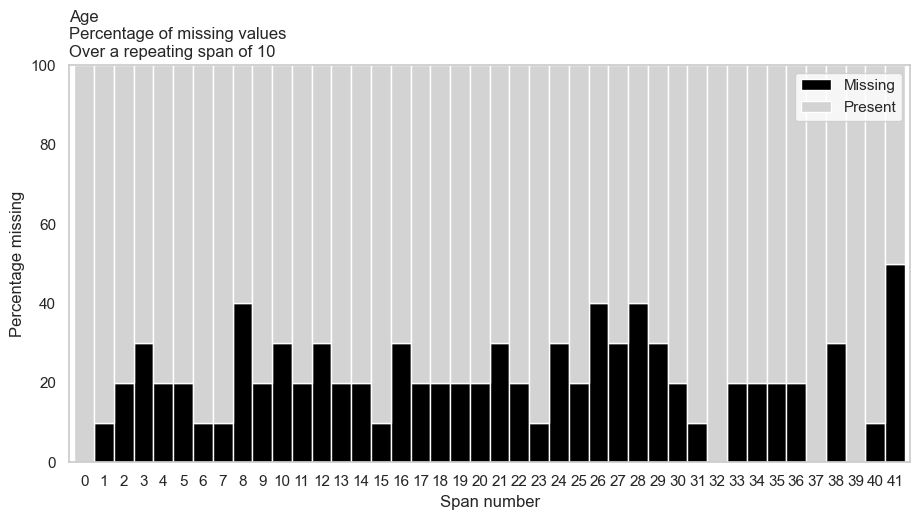

In [18]:
(
        df
        .missing
        .missing_variable_span_plot(
            variable=columns_with_missing[0], #Variable que está analizando
            span_every = 10, #Número de valores que tendrá el grupo

        )
)

#### Fare:

In [19]:
(
    df
    .missing
    .missing_variable_span(
        variable = columns_with_missing[1],
        span_every = 10
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,0,10,0.0,100.0
1,1,0,10,0.0,100.0
2,2,0,10,0.0,100.0
3,3,0,10,0.0,100.0
4,4,0,10,0.0,100.0
5,5,0,10,0.0,100.0
6,6,0,10,0.0,100.0
7,7,0,10,0.0,100.0
8,8,0,10,0.0,100.0
9,9,0,10,0.0,100.0


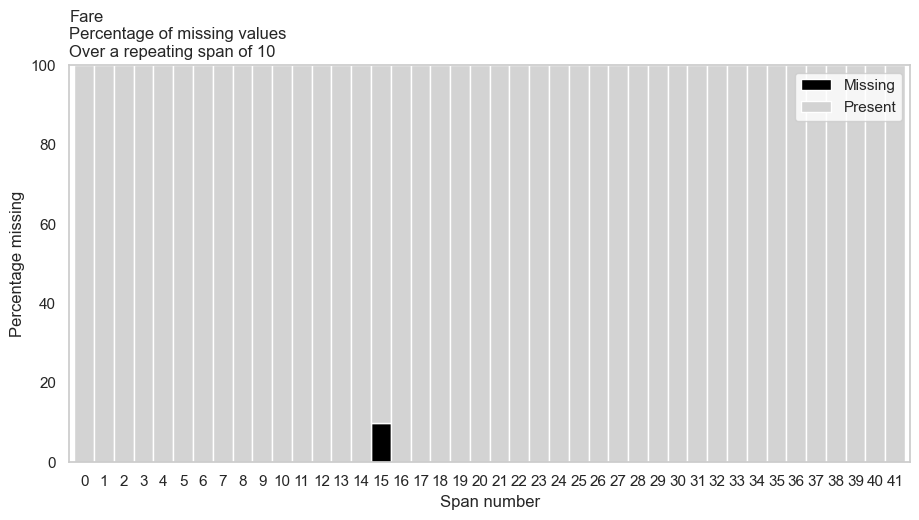

In [20]:
(
        df
        .missing
        .missing_variable_span_plot(
            variable=columns_with_missing[1], #Variable que está analizando
            span_every = 10, #Número de valores que tendrá el grupo

        )
)

#### Cabin:

In [21]:
(
    df
    .missing
    .missing_variable_span(
        variable = columns_with_missing[2],
        span_every = 10
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,10,0,100.0,0.0
1,1,8,2,80.0,20.0
2,2,7,3,70.0,30.0
3,3,9,1,90.0,10.0
4,4,6,4,60.0,40.0
5,5,6,4,60.0,40.0
6,6,7,3,70.0,30.0
7,7,6,4,60.0,40.0
8,8,9,1,90.0,10.0
9,9,8,2,80.0,20.0


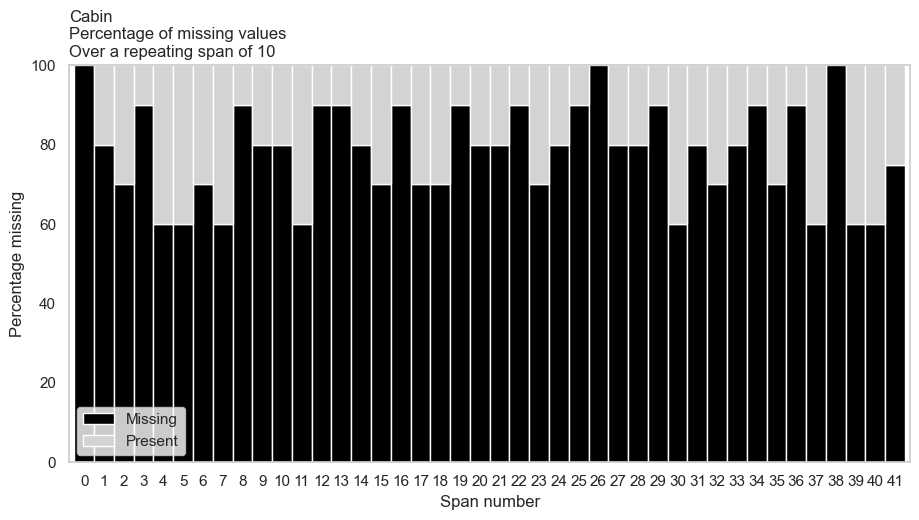

In [22]:
(
        df
        .missing
        .missing_variable_span_plot(
            variable=columns_with_missing[2], #Variable que está analizando
            span_every = 10, #Número de valores que tendrá el grupo

        )
)

### Intersección de valores faltantes

La siguiente gráfica muestra cuántas filas comparten las variables con valores faltantes.

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

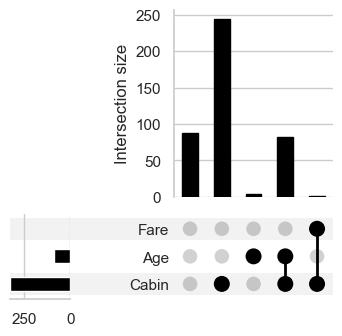

In [24]:
(
    df
    .missing
    .missing_upsetplot(
        variables=list(columns_with_missing), # None para mostrar la relacion de todas las variables
        element_size = 30  # tamaño de la visualizacion
    )
)

- La primera barra muestra en cuántas filas las variables no tienen ningún valor faltante.
- La segunda barra muestra en cuántas filas la variable `Cabin` tiene valores faltentes, pero las otras variables no.
- La Tercera barra muestra en cuántas filas la variable `Age` tiene valores faltentes, pero las otras variables no.
- La cuarta barra muestra en cuántas filas solamente las variables `Cabin` y `Age` tiene valores faltentes.
- La quinta barra muestra en cuántas filas solo las variables `Cabin` y `Fare` tiene valores faltentes.

### Picos de valores faltantes

<AxesSubplot:>

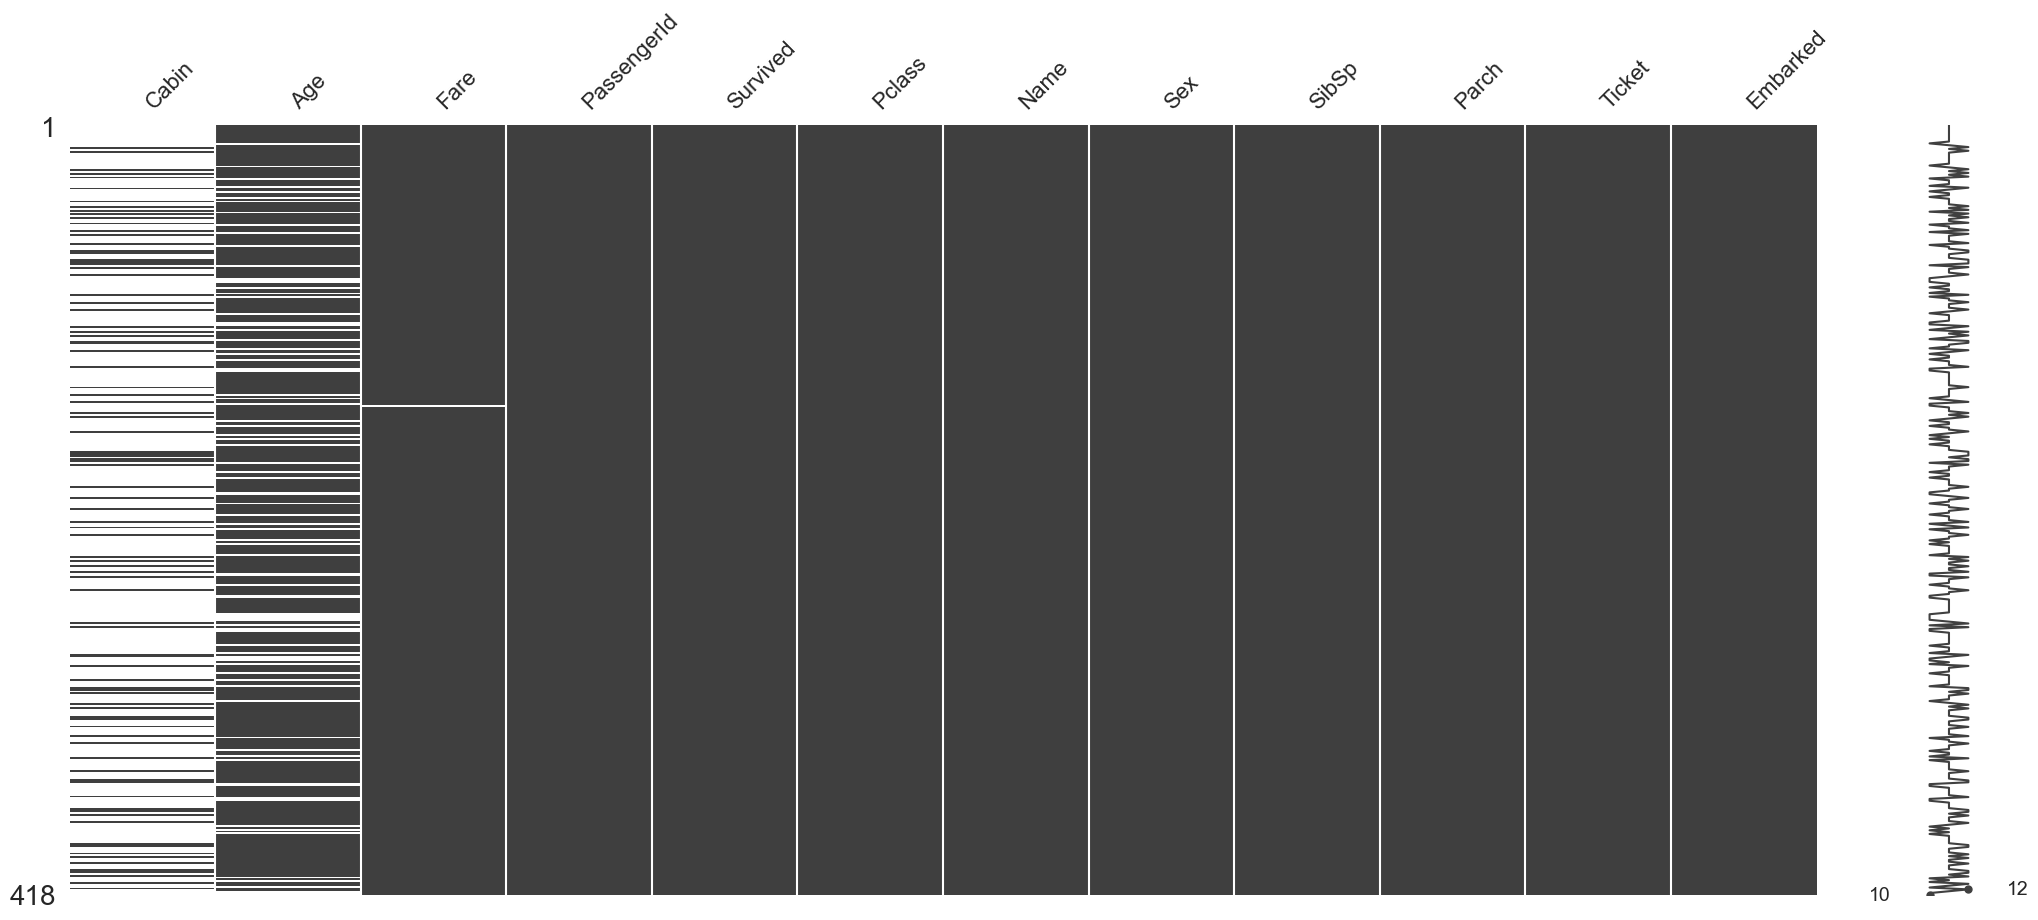

In [25]:
(
    df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)